In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
class SpikeTrainGenerator:
    def __init__(self, duration=1.0, dt=0.001):

        self.duration = duration
        self.dt = dt
        self.n_bins = int(duration / dt)
        
    def generate_poisson_spike_train(self, firing_rate):

        # Probability of a spike in each time bin
        p_spike = firing_rate * self.dt
        
        # Generate random numbers and compare with spike probability
        return (np.random.random(self.n_bins) < p_spike).astype(int)
    
    def generate_multiple_spike_trains(self, firing_rate, n_trials):

        spike_trains = np.zeros((n_trials, self.n_bins))
        for i in range(n_trials):
            spike_trains[i] = self.generate_poisson_spike_train(firing_rate)
        return spike_trains

In [ ]:
class SpikeTrainAnalyzer:
    def __init__(self, dt=0.001):

        self.dt = dt
        
    def plot_spike_train(self, spike_train, title="Spike Train"):

        time = np.arange(0, len(spike_train) * self.dt, self.dt)
        spike_times = time[spike_train == 1]
        
        plt.figure(figsize=(12, 3))
        plt.eventplot([spike_times], lineoffsets=[0.5], linelengths=[0.5], color='black')
        plt.xlabel('Time (s)')
        plt.ylabel('Spikes')
        plt.title(title)
        plt.yticks([])
        plt.xlim(0, len(spike_train) * self.dt)
        plt.tight_layout()
        plt.savefig("./latex/Fig1.png", dpi=300)
        plt.show()
        plt.close()
        
    def plot_raster(self, spike_trains, n_to_plot=None, title="Raster Plot"):

        if n_to_plot is None:
            n_to_plot = spike_trains.shape[0]
        else:
            n_to_plot = min(n_to_plot, spike_trains.shape[0])
            
        plt.figure(figsize=(8, 8))
        for i in range(n_to_plot):
            time = np.arange(0, spike_trains.shape[1] * self.dt, self.dt)
            spike_times = time[spike_trains[i] == 1]
            plt.plot(spike_times, np.ones_like(spike_times) * i, '|', color='black', markersize=5)
        
        plt.xlabel('Time (s)')
        plt.ylabel('Trial')
        plt.title(title)
        plt.xlim(0, spike_trains.shape[1] * self.dt)
        plt.ylim(-0.5, n_to_plot - 0.5)
        plt.tight_layout()
        plt.savefig("./latex/Fig2a.png", dpi=300)

        
    def count_spikes(self, spike_trains):

        return np.sum(spike_trains, axis=1)
    
    def plot_spike_count_histogram(self, spike_counts, title="Spike Count Histogram"):

        plt.figure(figsize=(7, 7))
        plt.hist(spike_counts, bins=20, color='skyblue', edgecolor='black')
        plt.xlabel('Spike Count')
        plt.ylabel('Frequency')
        plt.title(title)
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.savefig("./latex/Fig2b.png", dpi=300)
        # plt.show()
        
    def compute_isi(self, spike_train):
 
        spike_indices = np.where(spike_train == 1)[0]
        if len(spike_indices) < 2:
            return np.array([])
        
        isis = np.diff(spike_indices) * self.dt
        return isis
    
    def compute_cv(self, isis):
        """
        Compute the Coefficient of Variation (CV) of inter-spike intervals.
        
        """
        if len(isis) < 2:
            return np.nan
        
        return np.std(isis) / np.mean(isis)
    
    def plot_isi_histogram(self, isis, cv=None, title="ISI Histogram"):

        plt.figure(figsize=(10, 5))
        plt.hist(isis, bins=50, color='skyblue', edgecolor='black')
        plt.xlabel('Inter-spike Interval (s)')
        plt.ylabel('Frequency')
        
        if cv is not None:
            plt.title(f"{title} (CV = {cv:.2f})")
        else:
            plt.title(title)
            
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.savefig("./latex/Fig3.png", dpi=300)
        plt.show()
    
    def compute_spike_density(self, spike_trains, start_bin=None, end_bin=None):
        """
        Compute the spike density (spikes per second) at each time bin.
        
        """
        if start_bin is None:
            start_bin = 0
        if end_bin is None:
            end_bin = spike_trains.shape[1]
            
        # Slice the spike trains to the specified range
        spike_trains_slice = spike_trains[:, start_bin:end_bin]
        
        # Count spikes at each time bin across all trials
        total_spikes_per_bin = np.sum(spike_trains_slice, axis=0)
        
        # Compute spike density (spikes per second)
        spike_density = total_spikes_per_bin / (spike_trains.shape[0] * self.dt)
        
        return spike_density
    
    def plot_spike_density(self, spike_density, start_time=0, dt=None, title="Spike Density"):
        """
        Plot the spike density.
        

        """
        if dt is None:
            dt = self.dt
            
        time = np.arange(start_time, start_time + len(spike_density) * dt, dt)[:len(spike_density)]
        
        plt.figure(figsize=(12, 5))
        plt.bar(time, spike_density, width=dt, color='skyblue', edgecolor='black')
        plt.xlabel('Time (s)')
        plt.ylabel('Spike Density (spikes/s)')
        plt.title(title)
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()
    

## Question 1: Spike Train Statistics

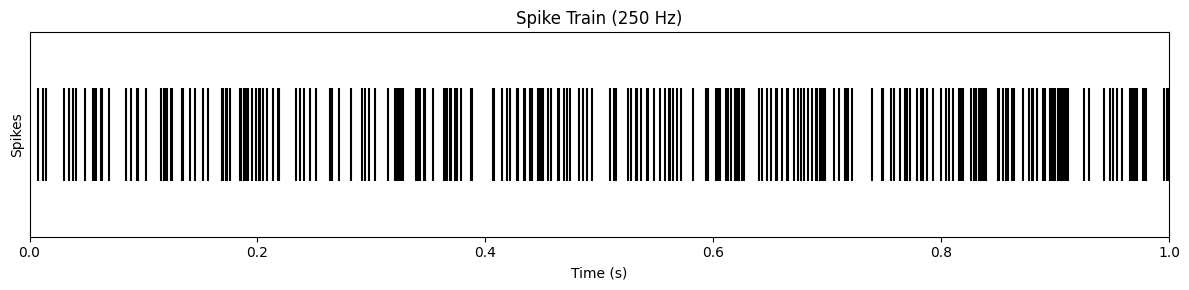

In [64]:
# 1.1 Create a spike train
generator = SpikeTrainGenerator(duration=1.0, dt=0.001)
analyzer = SpikeTrainAnalyzer(dt=0.001)

spike_train = generator.generate_poisson_spike_train(firing_rate=250)
analyzer.plot_spike_train(spike_train, title="Spike Train (250 Hz)")

80.61666666666666
73.85638888888889


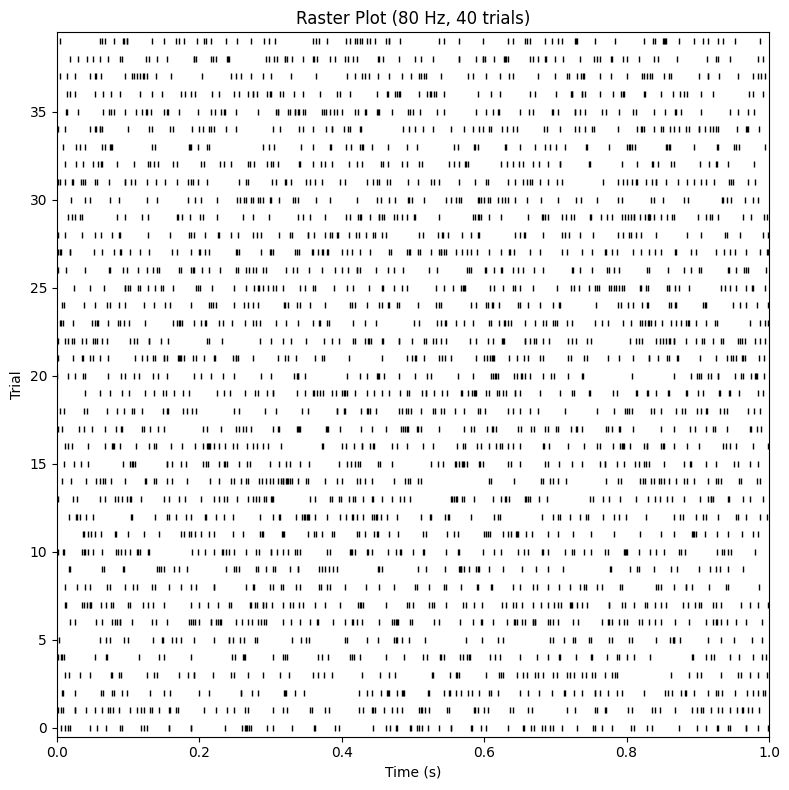

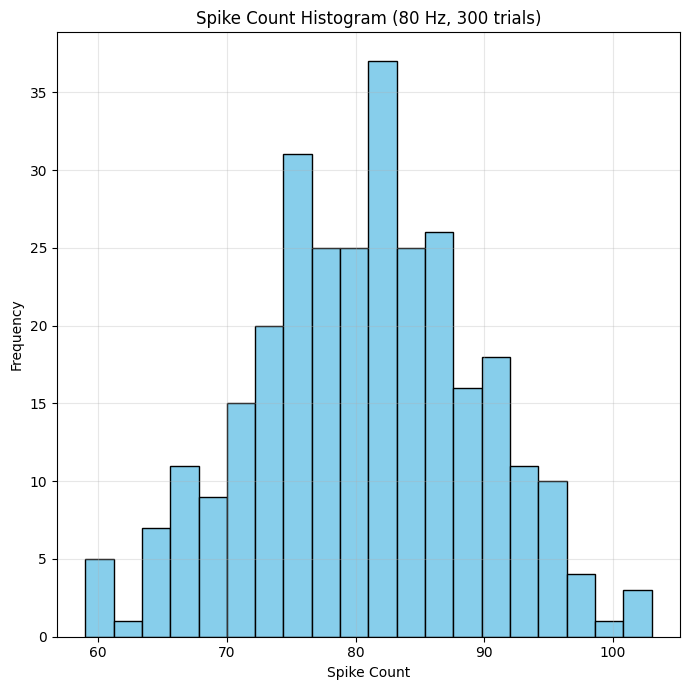

In [65]:
# 1.2 Create a raster plot and compute spike counts
spike_trains = generator.generate_multiple_spike_trains(firing_rate=80, n_trials=300)
analyzer.plot_raster(spike_trains, n_to_plot=40, title="Raster Plot (80 Hz, 40 trials)")

spike_counts = analyzer.count_spikes(spike_trains)
analyzer.plot_spike_count_histogram(spike_counts, title="Spike Count Histogram (80 Hz, 300 trials)")

print(spike_counts.mean())
print(spike_counts.var())



1.3 Computing ISI distribution...


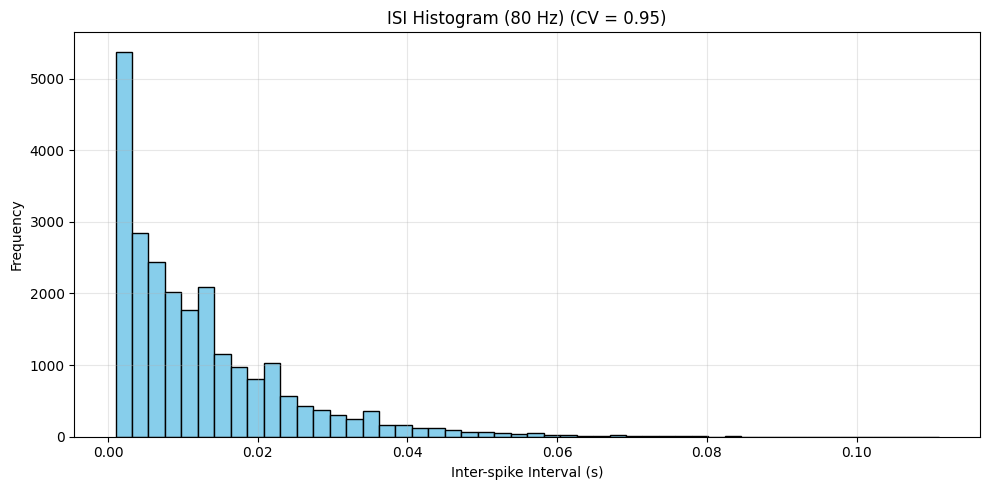

Coefficient of Variation (CV): 0.95
Mean ISI: 12.2824 s
Variance of ISI: 11.6234 s^2


In [69]:
# 1.3 Inter-spike interval distribution
print("\n1.3 Computing ISI distribution...")
all_isis = []
for i in range(300):
    isis = analyzer.compute_isi(spike_trains[i])
    all_isis.extend(isis)

all_isis = np.array(all_isis)
cv = analyzer.compute_cv(all_isis)
analyzer.plot_isi_histogram(all_isis, cv, title="ISI Histogram (80 Hz)")

print(f"Coefficient of Variation (CV): {cv:.2f}")
print(f"Mean ISI: {np.mean(all_isis * 1000):.4f} s")
print(f"Variance of ISI: {np.std(all_isis * 1000):.4f} s^2")

In [ ]:
   
class RealDataAnalyzer:
    def __init__(self, data_path):

        self.data = loadmat(data_path)
        self.frequencies = self.data['f1'][0]
        self.spike_trains = self.data['spt'][0]
        self.time = self.data['t'][0]
        self.dt = self.time[1] - self.time[0]
        self.duration = max(self.time) - min(self.time)
        
    def get_spike_train(self, stimulus_idx):
        """
        Get the spike trains for a specific stimulus.
        
        """
        return self.spike_trains[stimulus_idx]
    
    def plot_raster_with_stimulus(self, stimulus_idx, stim_start=0.2, stim_end=0.7, title=None):
        """
        Plot a raster plot with stimulus period highlighted.
        

        """
        spike_train = self.get_spike_train(stimulus_idx)
        n_trials = spike_train.shape[0]
        
        if title is None:
            title = f"Raster Plot for Stimulus {self.frequencies[stimulus_idx]} Hz"
        
        plt.figure(figsize=(12, 6))
        
        # Plot spike times
        for i in range(n_trials):
            trial_time = self.time[spike_train[i] == 1]
            plt.plot(trial_time, np.ones_like(trial_time) * i, '|', color='black', markersize=5)

        
        
        # Highlight stimulus period
        plt.axvspan(stim_start * self.duration , stim_end * self.duration, alpha=0.3, color='red')
        
        plt.xlabel('Time (s)')
        plt.ylabel('Trial')
        plt.title(title)
        plt.xlim(min(self.time), max(self.time))
        plt.ylim(-0.5, n_trials - 0.5)
        plt.tight_layout()
        plt.savefig(f"./latex/Fig4_{self.frequencies[stimulus_idx]}Hz.png", dpi=300)
        plt.show()
    
    def count_spikes_during_stimulation(self, stimulus_idx, stim_start=0.2, stim_end=0.7):
        """
        Count the number of spikes during the stimulus period for each trial.
        
        """
        spike_train = self.get_spike_train(stimulus_idx)
        n_trials = spike_train.shape[0]
        
        # Find time indices within stimulus period
        stim_mask = (self.time >= self.duration*stim_start) & (self.time <= self.duration*stim_end)
        time_indices = np.where(stim_mask)[0]
        
        spike_counts = np.zeros(n_trials)
        for i in range(n_trials):
            spike_counts[i] = np.sum(spike_train[i, time_indices])
            
        return spike_counts
    
    def compute_spike_density_during_stimulation(self, stimulus_idx, stim_start=0.2, stim_end=0.7):
        """
        Compute the spike density during the stimulus period.
        
        """
        spike_train = self.get_spike_train(stimulus_idx)
        n_trials = spike_train.shape[0]
        
        # Find time indices within stimulation period
        stim_mask = (self.time >= self.duration*stim_start) & (self.time <= self.duration*stim_end)
        time_indices = np.where(stim_mask)[0]
        time_bins = self.time[stim_mask]
        
        # Count spikes at each time bin across all trials
        total_spikes_per_bin = np.sum(spike_train[:, time_indices], axis=0)
        
        # Compute spike density (spikes per second)
        spike_density = total_spikes_per_bin / (n_trials * self.dt)
        
        return spike_density, time_bins, total_spikes_per_bin
    
    def plot_all_rasters(self, stim_start=0.2, stim_end=0.7):
        """
        Plot raster plots for all stimuli in a single figure.
        
        """
        n_stimuli = len(self.frequencies)
        
        plt.figure(figsize=(15, 10))
        
        trial_offset = 0
        y_ticks = []
        y_tick_labels = []
        
        for i in range(n_stimuli):
            spike_train = self.get_spike_train(i)
            n_trials = spike_train.shape[0]
            
            # Plot alternating background
            if i % 2 == 0:
                plt.axhspan(trial_offset - 0.5, trial_offset + n_trials - 0.5, alpha=0.1, color='gray')
            
            # Plot spike times with offset
            for j in range(n_trials):
                trial_time = self.time[spike_train[j] == 1]
                plt.plot(trial_time, np.ones_like(trial_time) * (j + trial_offset), '|', color='black', markersize=5)
            
            # Add y-ticks for this stimulus
            y_ticks.append(trial_offset + n_trials / 2)
            y_tick_labels.append(f"{self.frequencies[i]} Hz")
            
            trial_offset += n_trials
        
        # Highlight stimulus period
        plt.axvspan(self.duration * stim_start, self.duration * stim_end, alpha=0.2, color='red')
        
        plt.xlabel('Time (s)')
        plt.ylabel('Stimulus Frequency')
        plt.title('Raster Plots for All Stimuli')
        plt.xlim(min(self.time), max(self.time))
        plt.ylim(-0.5, trial_offset - 0.5)
        plt.yticks(y_ticks, y_tick_labels)
        plt.tight_layout()
        plt.savefig("./latex/Fig6.png", dpi=300)
        plt.show()
    
    def plot_all_spike_densities(self, stim_start=0.2, stim_end=0.7):
        """
        Plot spike densities for all stimuli during the stimulus period.
        
        """
        n_stimuli = len(self.frequencies)
        
        plt.figure(figsize=(15, 10))
        for i in range(n_stimuli):
            spike_density, time_bins, _ = self.compute_spike_density_during_stimulation(i, stim_start, stim_end)
            plt.subplot(n_stimuli, 1, n_stimuli - i)  # Reversed position to put highest freq on top
            plt.bar(time_bins, spike_density, width=self.dt, color='skyblue', edgecolor='black')
            plt.title(f"{self.frequencies[i]} Hz")
            plt.grid(alpha=0.3)
            
            # Only show x-label for the bottom plot
            if i == 0:
                plt.xlabel('Time (s)')
        
        # Add common y-label for the entire figure
        # plt.figtext(0.04, 0.5, 'Spike Density (spikes/s)', va='center', rotation='vertical')
        
        # Highlight stimulus period
        plt.tight_layout()
        plt.savefig("./latex/Fig7.png", dpi=300)
        plt.show()
    
    def compute_tuning_curve(self, stim_start=0.2, stim_end=0.7):
        """
        Compute the tuning curve of the neuron (firing rate vs. stimulus frequency).
        """
        n_stimuli = len(self.frequencies)
        stim_duration = (stim_end - stim_start)
        
        mean_rates = np.zeros(n_stimuli)
        variances = np.zeros(n_stimuli)
        
        for i in range(n_stimuli):
            spike_counts = self.count_spikes_during_stimulation(i, stim_start, stim_end)
            mean_count = np.mean(spike_counts)
            var_count = np.var(spike_counts)
            
            # Convert to spikes per second
            mean_rates[i] = mean_count / stim_duration
            variances[i] = var_count
            
        return mean_rates, variances
    
    def plot_tuning_curve(self, stim_start=0.2, stim_end=0.7):
        """
        Plot the tuning curve of the neuron.
        
        """
        mean_rates, variances = self.compute_tuning_curve(stim_start, stim_end)
        
        plt.figure(figsize=(10, 6))
        plt.errorbar(self.frequencies, mean_rates, 
                     yerr=np.sqrt(variances), 
                     fmt='o-', 
                    color='blue', ecolor='red', capsize=5)
        plt.xlabel('Stimulus Frequency (Hz)')
        plt.ylabel('Firing Rate (spikes/s)')
        plt.title('Tuning Curve')
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.savefig("./latex/Fig8.png", dpi=300)
        plt.show()
        
        return mean_rates, variances

In [136]:
data_path = './simdata.mat'

real_data = RealDataAnalyzer(data_path)

2.1 Plotting raster for the first stimulus (f1=8.4 Hz)...


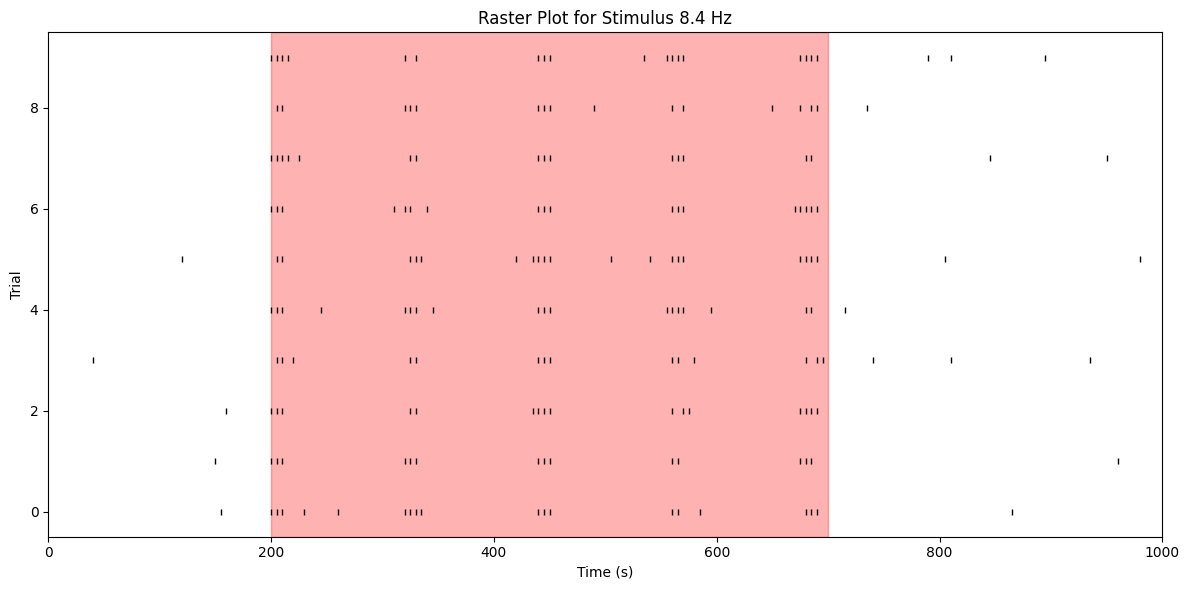

In [117]:
# 2.1 Raster plot
print("2.1 Plotting raster for the first stimulus (f1=8.4 Hz)...")
real_data.plot_raster_with_stimulus(0, stim_start=0.2, stim_end=0.7)


In [118]:
real_data.count_spikes_during_stimulation(0, stim_start=0.2, stim_end=0.7)

array([18., 14., 16., 14., 18., 19., 18., 15., 15., 18.])

In [119]:


# 2.2 Spikes count: mean and variance

for i in range(len(real_data.frequencies)):
    spike_counts = real_data.count_spikes_during_stimulation(i)
    mean_count = np.mean(spike_counts)
    var_count = np.var(spike_counts)
    stimulation_duration =  (0.7 - 0.2)  # in seconds

    print(f"\nStimulus frequency: {real_data.frequencies[i]} Hz")
    print(f"Mean spike count for: {mean_count:.2f}")
    print(f"Variance of spike counts: {var_count:.2f}")
    print(f"Mean firing rate: {mean_count / stimulation_duration:.4f} spikes/sec")
    print()




Stimulus frequency: 8.4 Hz
Mean spike count for: 16.50
Variance of spike counts: 3.25
Mean firing rate: 33.0000 spikes/sec


Stimulus frequency: 12.0 Hz
Mean spike count for: 19.90
Variance of spike counts: 2.09
Mean firing rate: 39.8000 spikes/sec


Stimulus frequency: 15.7 Hz
Mean spike count for: 23.60
Variance of spike counts: 3.84
Mean firing rate: 47.2000 spikes/sec


Stimulus frequency: 19.6 Hz
Mean spike count for: 29.90
Variance of spike counts: 2.49
Mean firing rate: 59.8000 spikes/sec


Stimulus frequency: 23.6 Hz
Mean spike count for: 35.60
Variance of spike counts: 6.24
Mean firing rate: 71.2000 spikes/sec


Stimulus frequency: 25.9 Hz
Mean spike count for: 39.50
Variance of spike counts: 8.65
Mean firing rate: 79.0000 spikes/sec


Stimulus frequency: 27.7 Hz
Mean spike count for: 41.80
Variance of spike counts: 3.56
Mean firing rate: 83.6000 spikes/sec


Stimulus frequency: 35.0 Hz
Mean spike count for: 52.90
Variance of spike counts: 11.09
Mean firing rate: 105.8000 spi

In [120]:
len(real_data.time)

201

In [121]:
len(real_data.spike_trains[0][0])

201


2.3 Computing and plotting spike density...


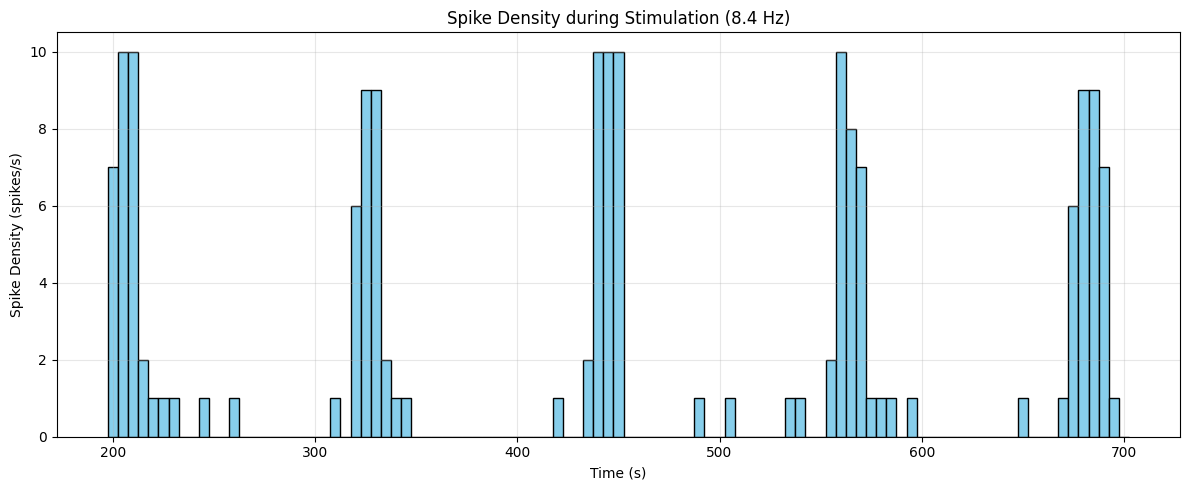

In [ ]:
# 2.3 Spike density
print("\n2.3 Computing and plotting spike density...")
spike_density, time_bins, total_spikes_per_bin  = real_data.compute_spike_density_during_stimulation(0)

plt.figure(figsize=(12, 5))
# plt.bar(time_bins, spike_density, width=real_data.dt, color='skyblue', edgecolor='black')
plt.bar(time_bins, total_spikes_per_bin, width=real_data.dt, color='skyblue', edgecolor='black')

plt.xlabel('Time (s)')
plt.ylabel('Spike Density (spikes/s)')
plt.title('Spike Density during Stimulation (8.4 Hz)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("./latex/Fig5.png", dpi=300)
plt.show()



2.4 Plotting all raster plots together...


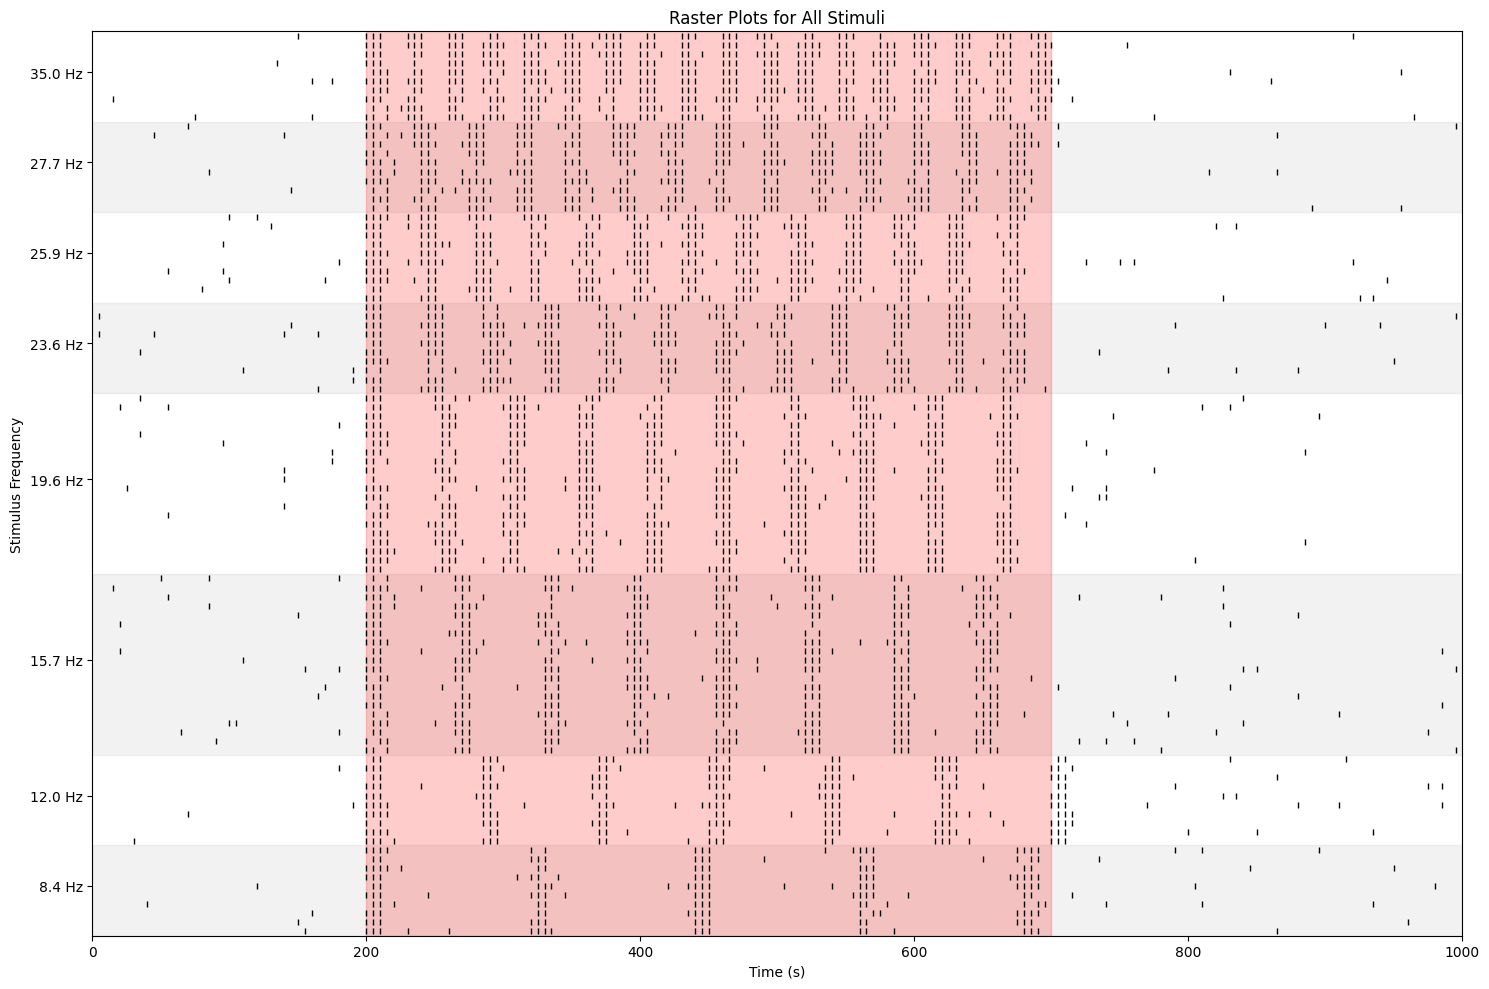

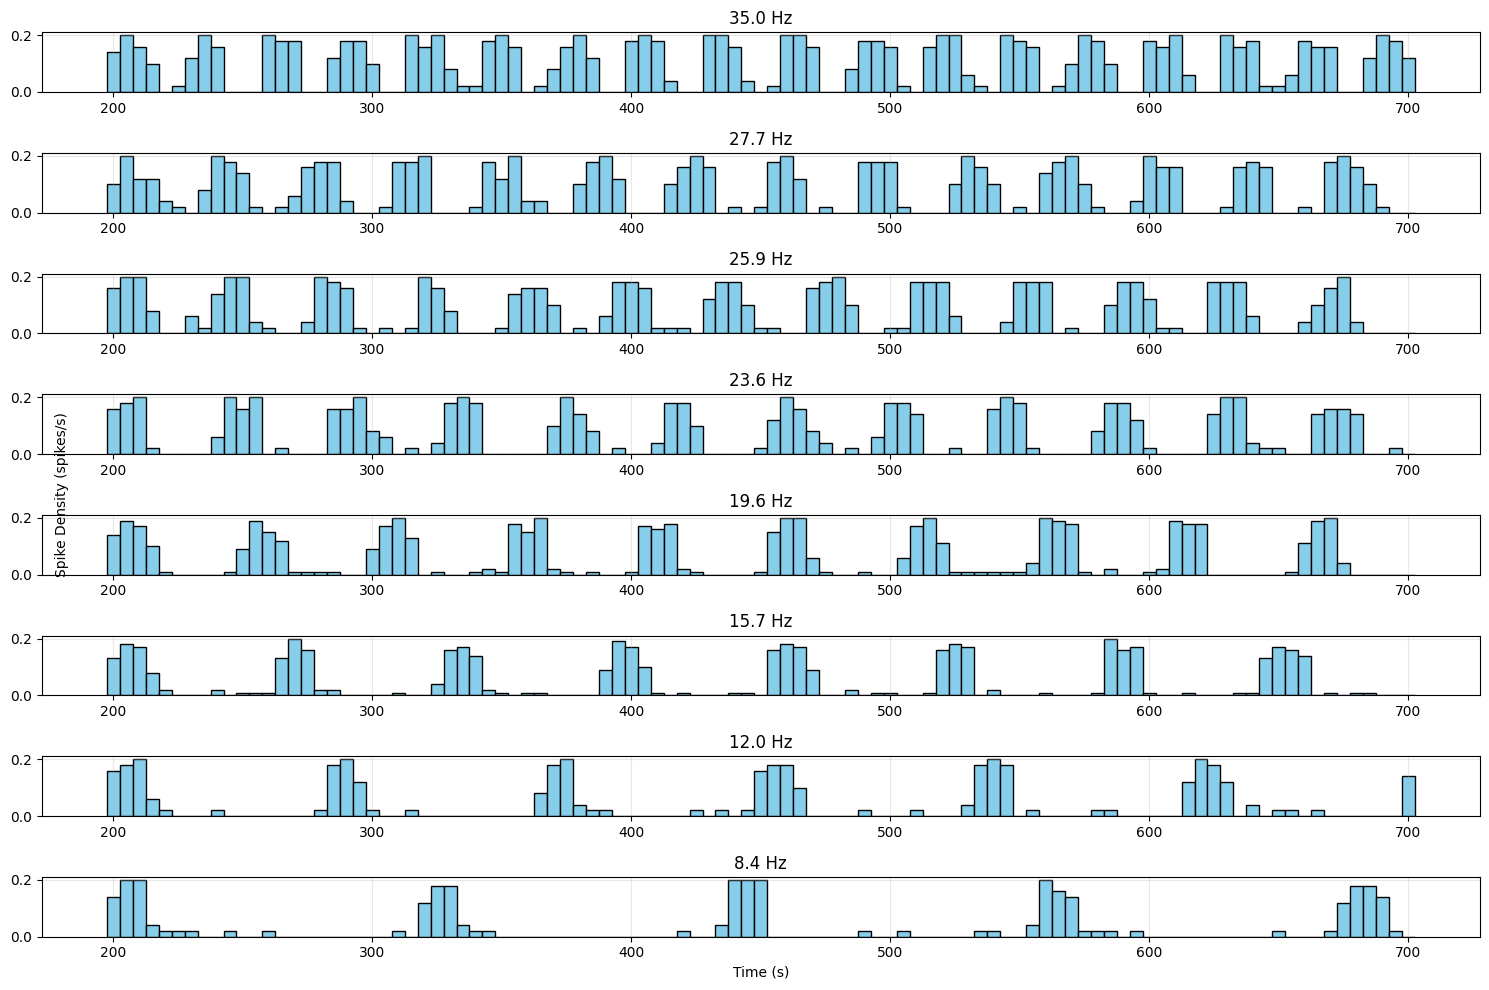

In [129]:


# 2.4 All rasterplots together
print("\n2.4 Plotting all raster plots together...")
real_data.plot_all_rasters()
real_data.plot_all_spike_densities()



2.5 Computing mean and variance of spike counts for all stimuli...


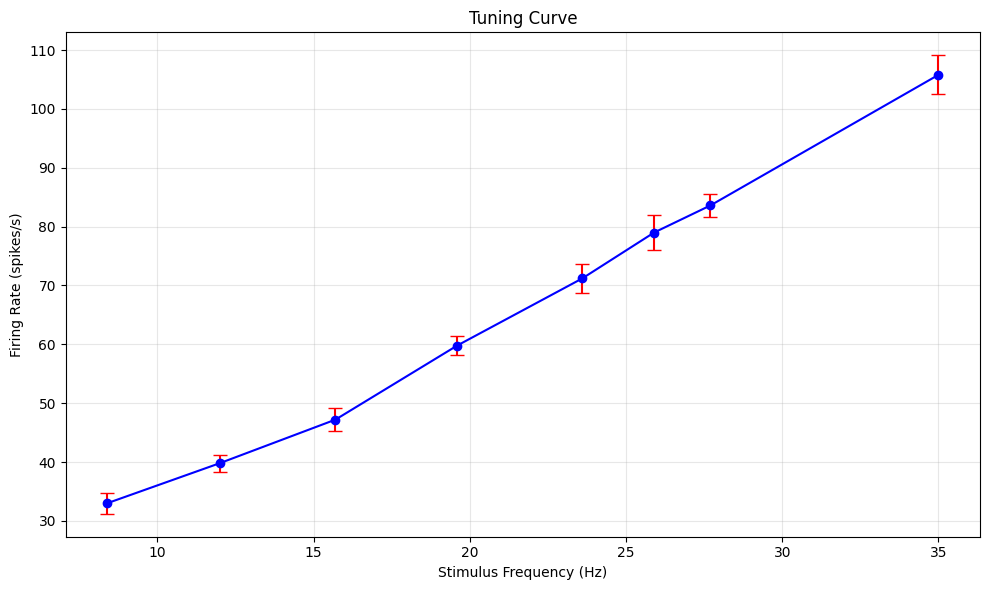

In [137]:


# 2.5 Mean and variance of spikes count

print("\n2.5 Computing mean and variance of spike counts for all stimuli...")
mean_rates, variances = real_data.plot_tuning_curve()


In [138]:
# Print the results
print("\nStimulus Frequencies, Mean Firing Rates, and Variances:")
for i, freq in enumerate(real_data.frequencies):
    print(f"Stimulus: {freq:.1f} Hz, Mean Rate: {mean_rates[i]:.2f} spikes/sec, Variance: {variances[i]:.2f}")




Stimulus Frequencies, Mean Firing Rates, and Variances:
Stimulus: 8.4 Hz, Mean Rate: 33.00 spikes/sec, Variance: 3.25
Stimulus: 12.0 Hz, Mean Rate: 39.80 spikes/sec, Variance: 2.09
Stimulus: 15.7 Hz, Mean Rate: 47.20 spikes/sec, Variance: 3.84
Stimulus: 19.6 Hz, Mean Rate: 59.80 spikes/sec, Variance: 2.49
Stimulus: 23.6 Hz, Mean Rate: 71.20 spikes/sec, Variance: 6.24
Stimulus: 25.9 Hz, Mean Rate: 79.00 spikes/sec, Variance: 8.65
Stimulus: 27.7 Hz, Mean Rate: 83.60 spikes/sec, Variance: 3.56
Stimulus: 35.0 Hz, Mean Rate: 105.80 spikes/sec, Variance: 11.09
